# Student Performance Factors

#### O quanto fatores externos e internos impactam o desempenho de alunos em exames? 

#### Informações sobre o Dataset

| **Atributo**                  | **Descrição**                                                                 |
|------------------------------|-------------------------------------------------------------------------------|
| `Hours_Studied`              | Número de horas de estudo por semana.                                        |
| `Attendance`                 | Porcentagem de presença nas aulas.                                          |
| `Parental_Involvement`      | Nível de envolvimento dos pais na educação do aluno (Low, Medium, High).     |
| `Access_to_Resources`       | Disponibilidade de recursos educacionais (Low, Medium, High).                |
| `Extracurricular_Activities`| Participação em atividades extracurriculares (Yes, No).                      |
| `Sleep_Hours`               | Média de horas de sono por noite.                                            |
| `Previous_Scores`           | Notas obtidas em provas anteriores.                                          |
| `Motivation_Level`          | Nível de motivação do aluno (Low, Medium, High).                             |
| `Internet_Access`           | Acesso à internet (Yes, No).                                                 |
| `Tutoring_Sessions`         | Número de sessões de reforço escolar por mês.                                |
| `Family_Income`             | Nível de renda familiar (Low, Medium, High).                                 |
| `Teacher_Quality`           | Qualidade dos professores (Low, Medium, High).                               |
| `School_Type`               | Tipo de escola frequentada (Public, Private).                                |
| `Peer_Influence`            | Influência dos colegas no desempenho acadêmico (Positive, Neutral, Negative).|
| `Physical_Activity`         | Média de horas de atividade física por semana.                               |
| `Learning_Disabilities`     | Presença de dificuldades de aprendizagem (Yes, No).                          |
| `Parental_Education_Level`  | Nível de escolaridade dos pais (High School, College, Postgraduate).         |
| `Distance_from_Home`        | Distância de casa até a escola (Near, Moderate, Far).                        |
| `Gender`                    | Gênero do aluno (Male, Female).                                              |
| `Exam_Score`                | Nota final na prova.                                                         |

#### O dataset conta com 20 colunas e 6.607 linhas

### Perguntas a serem respondidas:

#### 1. Qual o perfil dos alunos? Qual o maior intervalo de notas no geral? Qual a distribuição de horas e frequência?
#### 2. Quais os quartis de notas e frequência, além do desvio padrão?
#### 3. Qual o perfil mais comum de alunos quando olhamos para recursos (educacionais, internet, atividades extras e renda)?
#### 4. Existe correlação entre horas estudades e notas dos exames?
#### 5. Existe relação entre renda e formação dos pais com sucesso do aluno?
#### 6. Quais variáveis tem maior relação com presença?
#### 7. Como o envolvimento parental impacta em outras caracteríticas (recursos educacionais, atividades extracurriculares e nivel de motivação)?
#### 8. Qual seria o fator mais importate para uma boa nota: horas de sono, presença ou horas estudadas?
#### 9. Existe algum grupo mais, ou menos, predisposto a ser negativamente influenciado pelos pares, quando olhas para envolvimento familiar, renda, ou gênero?

## Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set()

## Importação de csv

In [2]:
data = pd.read_csv("StudentPerformanceFactors.csv")
df = data.copy()

## Pergunta 1

#### 1. Qual o perfil dos alunos? Qual o maior intervalo de notas no geral? Qual a distribuição de horas e frequência?

##### Função de estatísticas
###### Uma função para nos poupar o trabalho de puxar média, moda, mediana, mínimo e etcs

In [3]:
def est(x):
    print("Estatísticas da Coluna:", x)
    print(" - Média:", df[x].mean())
    print(" - Mediana:", df[x].median())
    print(" - Moda:", df[x].mode().values[0] if not df[x].mode().empty else "Não existe moda")
    print(" - Mínimo:", df[x].min())
    print(" - Máximo:", df[x].max())
    print(" - Desvio padrão:", df[x].std())
    print(" - Variância:", df[x].var())
    print(" - 1º Quartil (Q1):", df[x].quantile(0.25))
    print(" - 3º Quartil (Q3):", df[x].quantile(0.75))
    print(" - Coeficiente de assimetria (Skewness):", df[x].skew())
    print(" - Curtose (Kurtosis):", df[x].kurtosis())

##### Intervalo de Notas

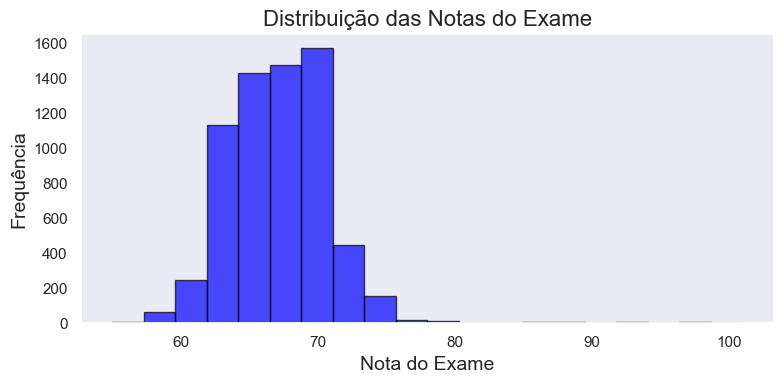

In [4]:
plt.figure(figsize=(8, 4), facecolor = 'white')
plt.hist(df['Exam_Score'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Notas do Exame', fontsize=16)
plt.xlabel('Nota do Exame', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Melhorando o layout e mostrando o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

In [5]:
est('Exam_Score')

Estatísticas da Coluna: Exam_Score
 - Média: 67.23565914938702
 - Mediana: 67.0
 - Moda: 68
 - Mínimo: 55
 - Máximo: 101
 - Desvio padrão: 3.890455781261732
 - Variância: 15.135646185952833
 - 1º Quartil (Q1): 65.0
 - 3º Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.6448082853982677
 - Curtose (Kurtosis): 10.575422734795485


##### Intervalo de Horas Estudadas

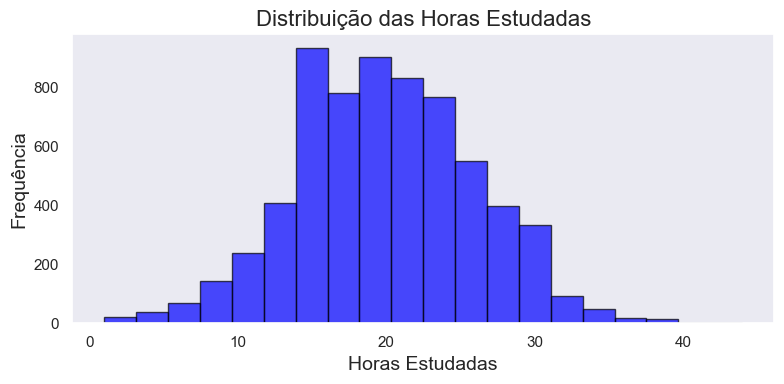

In [6]:
plt.figure(figsize=(8, 4), facecolor = 'white')
plt.hist(df['Hours_Studied'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Horas Estudadas', fontsize=16)
plt.xlabel('Horas Estudadas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Melhorando o layout e mostrando o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

In [7]:
est('Hours_Studied')

Estatísticas da Coluna: Hours_Studied
 - Média: 19.975329196306948
 - Mediana: 20.0
 - Moda: 20
 - Mínimo: 1
 - Máximo: 44
 - Desvio padrão: 5.9905943365787415
 - Variância: 35.88722050544929
 - 1º Quartil (Q1): 16.0
 - 3º Quartil (Q3): 24.0
 - Coeficiente de assimetria (Skewness): 0.013498908859762987
 - Curtose (Kurtosis): 0.017770627289391605


##### Intervalo de Frequência

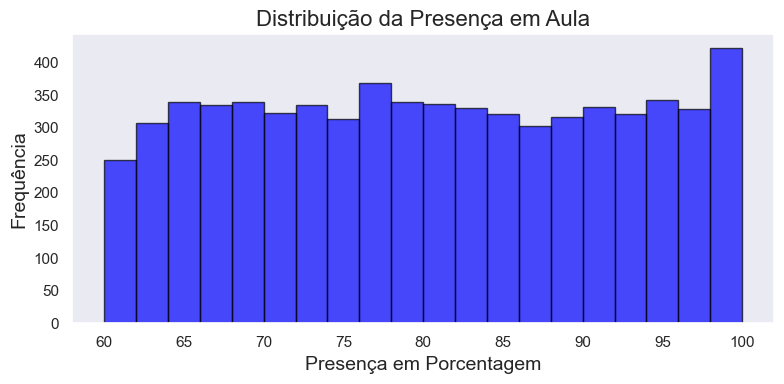

In [8]:
plt.figure(figsize=(8, 4), facecolor = 'white')
plt.hist(df['Attendance'], bins=20, color='blue', edgecolor='black', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição da Presença em Aula', fontsize=16)
plt.xlabel('Presença em Porcentagem', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Melhorando o layout e mostrando o gráfico
plt.grid(False)
plt.tight_layout()
plt.show()

In [9]:
est('Attendance')

Estatísticas da Coluna: Attendance
 - Média: 79.97744816104132
 - Mediana: 80.0
 - Moda: 67
 - Mínimo: 60
 - Máximo: 100
 - Desvio padrão: 11.547474961482814
 - Variância: 133.3441779860725
 - 1º Quartil (Q1): 70.0
 - 3º Quartil (Q3): 90.0
 - Coeficiente de assimetria (Skewness): 0.013665859547014896
 - Curtose (Kurtosis): -1.1944066537666138


#### Resposta da Pergunta 1:
##### Em geral, o perfil do aluno é aquele tira normalmente 68 no exame, com 20 horas de estudo por semana (sendo mais exato 19.97) e com mediana de 80% de presença nas aulas. Resumidamente podemos considerar que o perfil dos estudantes desse dataset pode ser considerada razoável para bom (mas convenhamos que 20 horas de estudo aplicado por semana é um ótimo número).

## Pergunta 2

#### 2. Quais os quartis de notas e frequência, além do desvio padrão?

##### Estatísticas de Notas

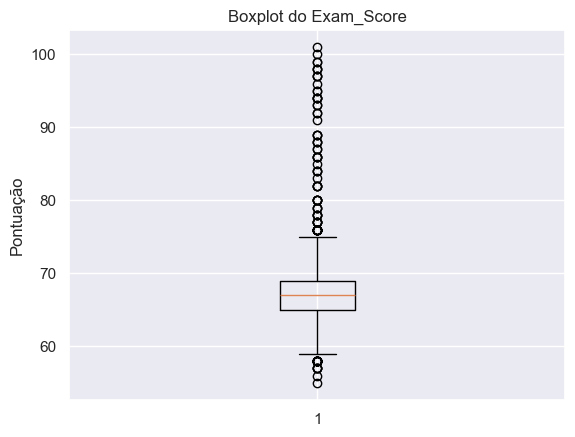

In [10]:
plt.boxplot(df['Exam_Score'])
plt.title('Boxplot do Exam_Score')
plt.ylabel('Pontuação')
plt.show()

In [11]:
est('Exam_Score')

Estatísticas da Coluna: Exam_Score
 - Média: 67.23565914938702
 - Mediana: 67.0
 - Moda: 68
 - Mínimo: 55
 - Máximo: 101
 - Desvio padrão: 3.890455781261732
 - Variância: 15.135646185952833
 - 1º Quartil (Q1): 65.0
 - 3º Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.6448082853982677
 - Curtose (Kurtosis): 10.575422734795485


##### Estatísticas de Frequência

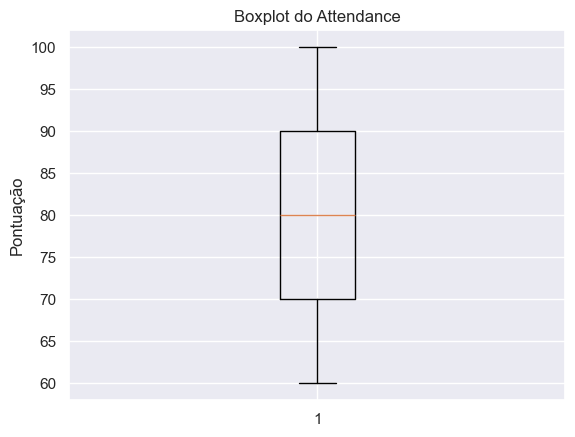

In [12]:
plt.boxplot(df['Attendance'])
plt.title('Boxplot do Attendance')
plt.ylabel('Pontuação')
plt.show()

In [13]:
est('Attendance')

Estatísticas da Coluna: Attendance
 - Média: 79.97744816104132
 - Mediana: 80.0
 - Moda: 67
 - Mínimo: 60
 - Máximo: 100
 - Desvio padrão: 11.547474961482814
 - Variância: 133.3441779860725
 - 1º Quartil (Q1): 70.0
 - 3º Quartil (Q3): 90.0
 - Coeficiente de assimetria (Skewness): 0.013665859547014896
 - Curtose (Kurtosis): -1.1944066537666138


#### Resposta da Pergunta 2:
##### Os quartis de Notas são 65 e 69 respectivamente (1° e 3°), já os de Presença são 70% e 90%. Os desvios padrão são 3.89 e 11.55 para Notas e Presença.

## Problema 3

#### 3. Qual o perfil mais comum de alunos quando olhamos para recursos (educacionais, internet, atividades extras e renda)?

##### Recursos Educacionais

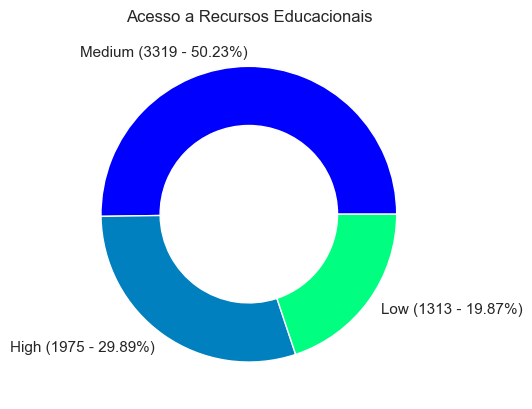

In [14]:
contagem = df['Access_to_Resources'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# Número de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Recursos Educacionais')
plt.show();

##### Acesso a Internet

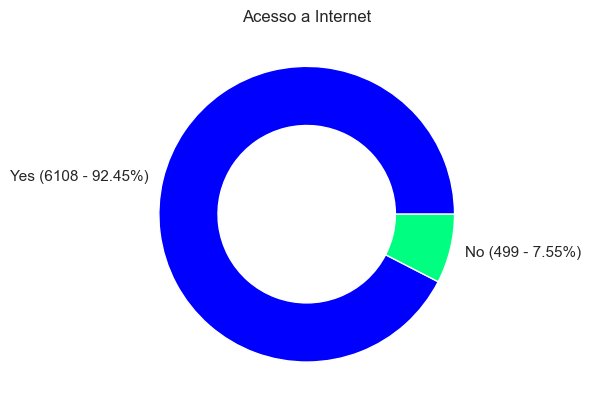

In [15]:
contagem = df['Internet_Access'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# Número de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Internet')
plt.show();

##### Atividades Extracurriculares

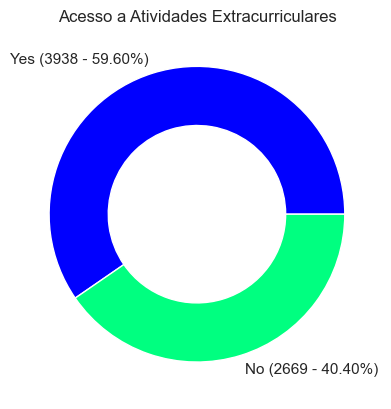

In [16]:
contagem = df['Extracurricular_Activities'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# Número de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Atividades Extracurriculares')
plt.show();

##### Renda Familiar

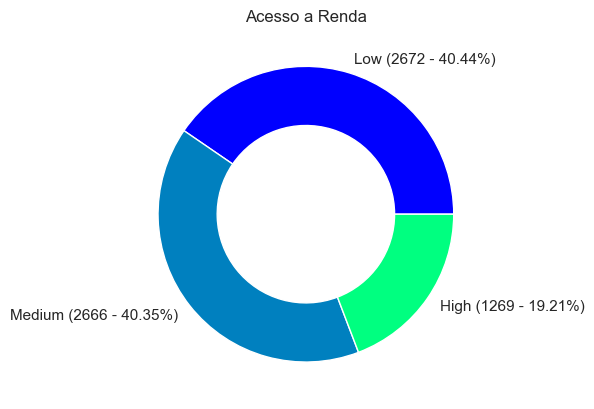

In [17]:
contagem = df['Family_Income'].value_counts()
total = contagem.sum()
labels = [f'{categoria} ({valor} - {pct:.2%})' for categoria, valor, pct in zip(contagem.index, contagem.values, (contagem.values/total))]

# Número de categorias
n = len(contagem)

# Gera uma paleta com n cores da paleta 'Set3' (ou outra)
cmap = plt.get_cmap('winter', n)
cores = [cmap(i) for i in range(n)]

plt.pie(
    contagem.values,
    labels=labels,
    wedgeprops={'width': 0.4},
    colors=cores
)
plt.title('Acesso a Renda')
plt.show();

#### Resposta da Pergunta 3:
##### O perfil mais comum de alunos é acesso médio a recursos educacionais, grande maioria com acesso a internet, 60% pratica atividades extracurriculares e a renda familiar fica dividida acirradamente entre Low e Medium.

# Pergunta 4

#### 4. Existe correlação entre horas estudades e notas dos exames?

Text(0, 0.5, 'Horas de Estudo')

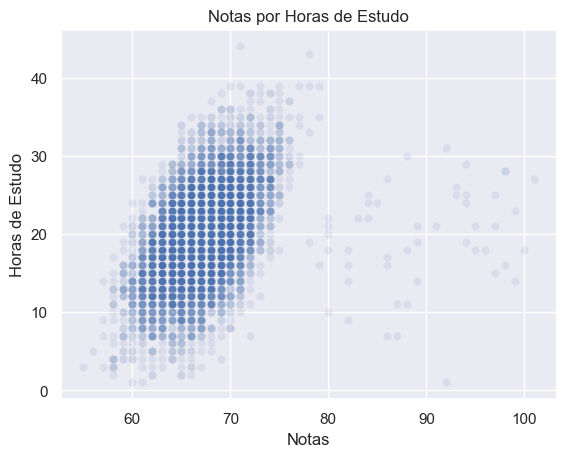

In [18]:
sns.scatterplot(
    data = df, 
    x = df['Exam_Score'], 
    y = df['Hours_Studied'],
    alpha = 0.1
);

plt.title('Notas por Horas de Estudo')
plt.xlabel('Notas')
plt.ylabel('Horas de Estudo')

In [19]:
df['Hours_Studied'].corr(df['Exam_Score'])

0.4454549540752822

#### Resposta da Pergunta 4:
##### Existe sim uma correlação, porém ela é considerada fraca-média nesse caso, o que com certeza no leva a pensar que outros fatores pesam na nota do estudante além de horas de estudo apenas.

# Pergunta 5

#### 5. Existe relação entre renda e formação dos pais com sucesso do aluno?

##### Renda e Nota

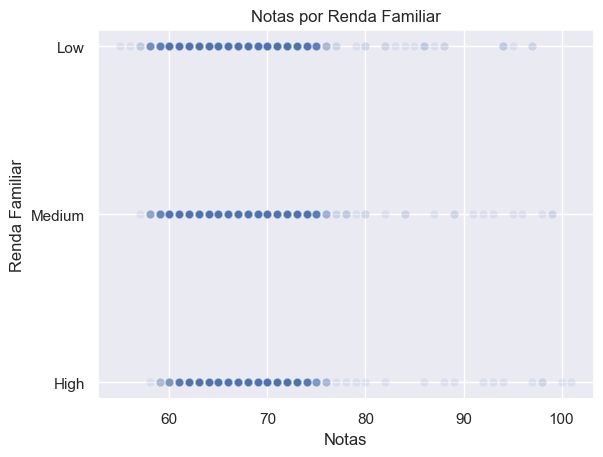

In [20]:
sns.scatterplot(
    data = df, 
    x = df['Exam_Score'], 
    y = df['Family_Income'],
    alpha = 0.1
);

plt.title('Notas por Renda Familiar')
plt.xlabel('Notas')
plt.ylabel('Renda Familiar');

##### Formação dos pais e notas

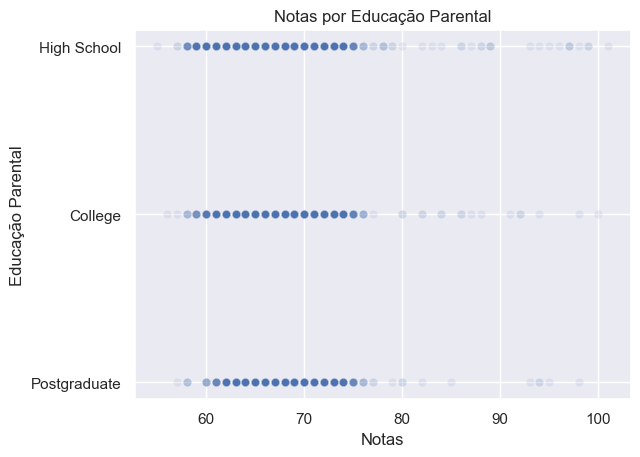

In [21]:
sns.scatterplot(
    data = df, 
    x = df['Exam_Score'], 
    y = df['Parental_Education_Level'],
    alpha = 0.1
);

plt.title('Notas por Educação Parental')
plt.xlabel('Notas')
plt.ylabel('Educação Parental');

##### Numericamente falando:

In [22]:
def est_altered(x, renda, educacao):
    # Filtrando o dataframe com base na renda e na educação parental
    df_filtered = df[(df['Family_Income'] == renda) & (df['Parental_Education_Level'] == educacao)]
    
    if df_filtered.empty:
        print(f"Não há dados para renda {renda} e educação {educacao}.")
        return
    
    # Calculando as estatísticas
    print(f"Estatísticas para o caso da renda ser {renda} e a educação parental ser {educacao}:")
    print(" - Média:", df_filtered[x].mean())
    print(" - Mediana:", df_filtered[x].median())
    print(" - Moda:", df_filtered[x].mode().values[0] if not df_filtered[x].mode().empty else "Não existe moda")
    print(" - Mínimo:", df_filtered[x].min())
    print(" - Máximo:", df_filtered[x].max())
    print(" - Desvio padrão:", df_filtered[x].std())
    print(" - Variância:", df_filtered[x].var())
    print(" - 1º Quartil (Q1):", df_filtered[x].quantile(0.25))
    print(" - 3º Quartil (Q3):", df_filtered[x].quantile(0.75))
    print(" - Coeficiente de assimetria (Skewness):", df_filtered[x].skew())
    print(" - Curtose (Kurtosis):", df_filtered[x].kurtosis())
    print(" ")

In [23]:
for i in df['Family_Income'].unique():
    for j in df['Parental_Education_Level'].unique():
        est_altered('Exam_Score', i, j)

Estatísticas para o caso da renda ser Low e a educação parental ser High School:
 - Média: 66.50191570881226
 - Mediana: 66.0
 - Moda: 66
 - Mínimo: 55
 - Máximo: 97
 - Desvio padrão: 3.832401937356514
 - Variância: 14.687304609453964
 - 1º Quartil (Q1): 64.0
 - 3º Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.408354826978305
 - Curtose (Kurtosis): 9.116573052038449
 
Estatísticas para o caso da renda ser Low e a educação parental ser College:
 - Média: 66.84844720496895
 - Mediana: 67.0
 - Moda: 65
 - Mínimo: 56
 - Máximo: 94
 - Desvio padrão: 3.7335893922615173
 - Variância: 13.939689750007727
 - 1º Quartil (Q1): 65.0
 - 3º Quartil (Q3): 69.0
 - Coeficiente de assimetria (Skewness): 1.28184067326049
 - Curtose (Kurtosis): 6.5520566517454295
 
Estatísticas para o caso da renda ser Low e a educação parental ser Postgraduate:
 - Média: 67.75143403441683
 - Mediana: 68.0
 - Moda: 67
 - Mínimo: 57
 - Máximo: 95
 - Desvio padrão: 3.7395285277831225
 - Variância: 13.98407361

#### Resposta da Pergunta 5:
##### Existe sim uma correlação, porém consideramos ela fraca nesse, fatores citados antes melhoram minimamente o rendimento de notas no dataset.

## Pergunta 6

#### 6. Quais variáveis tem maior relação com presença?

##### Tratamento de variáveis

In [24]:
# Preenchendo valores faltantes com a moda (valor mais comum)
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cópia do DataFrame original
df_encoded = df.copy()

# Mapeamentos manuais
map_levels = {'Low': 0, 'Medium': 1, 'High': 2}
map_yesno = {'No': 0, 'Yes': 1}
map_school = {'Public': 0, 'Private': 1}
map_peer = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
map_gender = {'Male': 0, 'Female': 1}
map_edu = {'High School': 0, 'College': 1, 'Postgraduate': 2}
map_distance = {'Near': 0, 'Moderate': 1, 'Far': 2}

# Aplicando os mapeamentos
df_encoded['Parental_Involvement'] = df['Parental_Involvement'].map(map_levels)
df_encoded['Family_Income'] = df['Family_Income'].map(map_levels)
df_encoded['Access_to_Resources'] = df['Access_to_Resources'].map(map_levels)
df_encoded['Motivation_Level'] = df['Motivation_Level'].map(map_levels)
df_encoded['Internet_Access'] = df['Internet_Access'].map(map_yesno)
df_encoded['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(map_yesno)
df_encoded['Learning_Disabilities'] = df['Learning_Disabilities'].map(map_yesno)
df_encoded['School_Type'] = df['School_Type'].map(map_school)
df_encoded['Peer_Influence'] = df['Peer_Influence'].map(map_peer)
df_encoded['Gender'] = df['Gender'].map(map_gender)
df_encoded['Parental_Education_Level'] = df['Parental_Education_Level'].map(map_edu)
df_encoded['Distance_from_Home'] = df['Distance_from_Home'].map(map_distance)
df_encoded['Teacher_Quality'] = df['Teacher_Quality'].map(map_levels)

In [25]:
df_encoded.select_dtypes(include='object').nunique()

Series([], dtype: float64)

##### Heatmap de Correlação

In [26]:
correlacoes = df_encoded.corr()['Attendance'].sort_values(ascending=False)

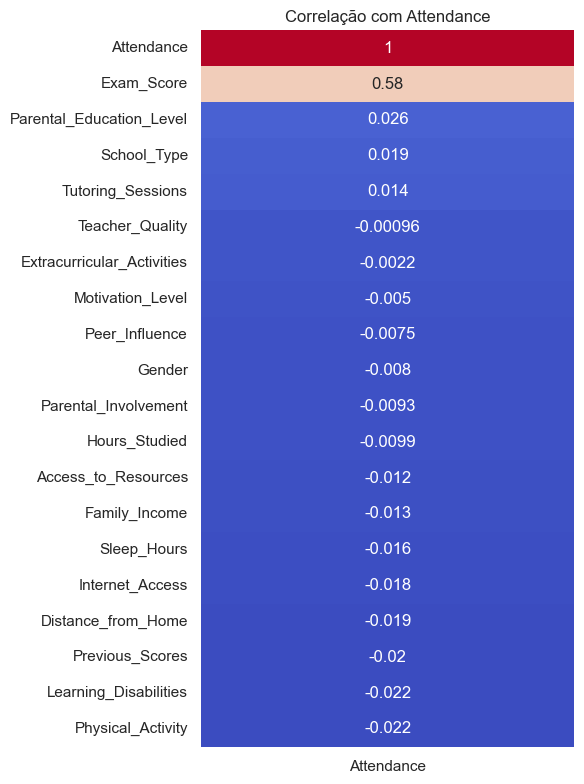

In [27]:
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlação com Attendance')
plt.tight_layout()
plt.show()

#### Resposta da Pergunta 6:
##### A maior variável que tem correlação com presença (Attendance) é a Exam_Score, todas as outras a correlação pode ser considerada como 0 ou muito desprezível.

## Pergunta 7

#### 7. Como o envolvimento parental impacta em outras caracteríticas (recursos educacionais, atividades extracurriculares e nivel de motivação)?

In [28]:
df_parent = df_encoded.copy()
df_parent = df_parent[['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level']]

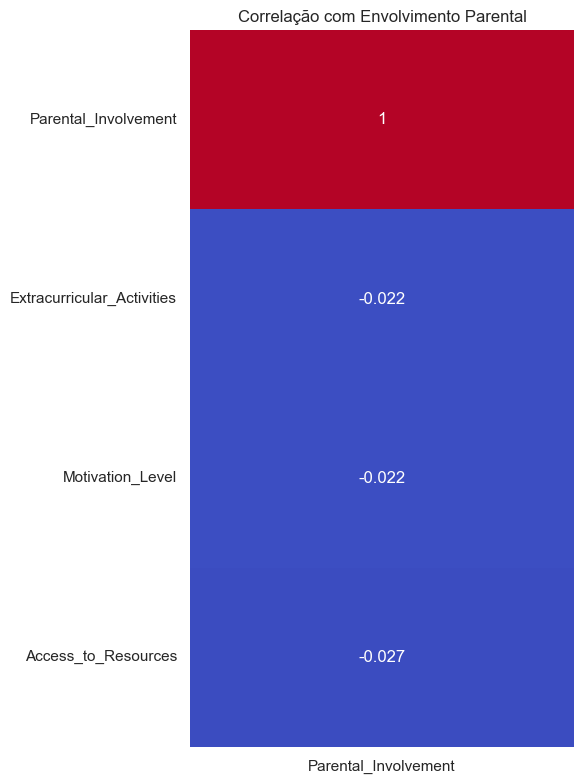

In [29]:
correlacoes_p = df_parent.corr()['Parental_Involvement'].sort_values(ascending=False)
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes_p.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlação com Envolvimento Parental')
plt.tight_layout()
plt.show()

#### Resposta da Pergunta 7:
##### Existe uma correlação muito fraca das variáveis anteriormente mencionadas, nenhuma delas mostrou impacto significativo algum com envolvimento parental.

## Pergunta 8

#### 8. Qual seria o fator mais importate para uma boa nota: horas de sono, presença ou horas estudadas?

In [30]:
df_scores = df_encoded.copy()
df_scores = df_scores[['Exam_Score', 'Sleep_Hours', 'Attendance', 'Hours_Studied']]

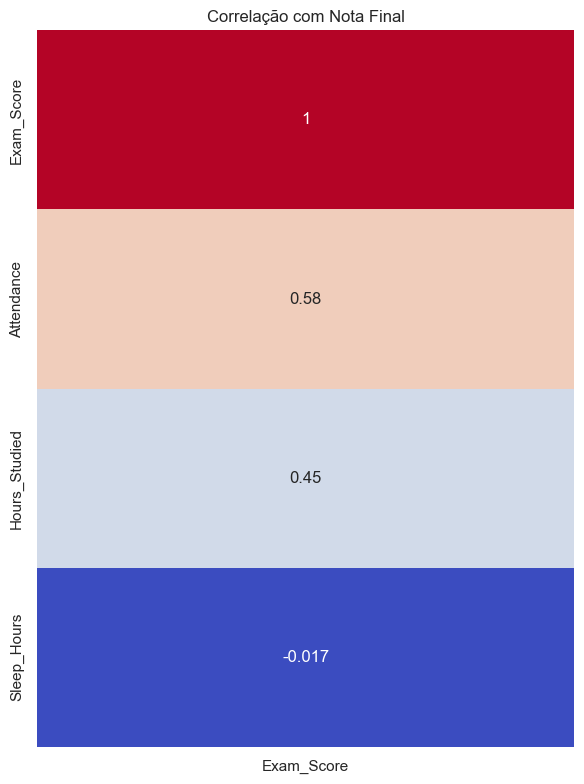

In [31]:
correlacoes_s = df_scores.corr()['Exam_Score'].sort_values(ascending=False)
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes_s.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlação com Nota Final')
plt.tight_layout()
plt.show()

#### Resposta da Pergunta 8:
##### Existe uma correlação média das variáveis anteriormente mencionadas. A análise mostrou que presença (Attendance) e horas estudadas (Hours_Studied) se mostraram com correlação média para a nota do exame, enquanto as horas de sono (Sleep_Hours) foram nada significantes na análise.

## Pergunta 9

#### 9. Existe algum grupo mais, ou menos, predisposto a ser negativamente influenciado pelos pares, quando olhas para envolvimento familiar, renda, ou gênero?

#### Existe correlação diferente para diferentes grupos?

In [32]:
correlacoes_peer = df_encoded.corr()['Peer_Influence'].sort_values(ascending=False)

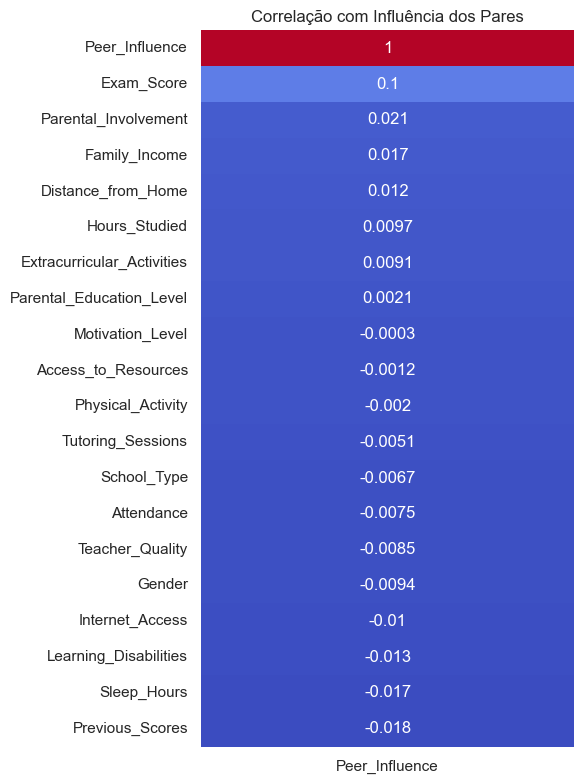

In [33]:
plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes_peer.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlação com Influência dos Pares')
plt.tight_layout()
plt.show()

##### Separação de Pares

In [34]:
#Negativo
df_0 = df_encoded.copy()
df_0 = df_0[df_0['Peer_Influence'] == 0]

#Neutro
df_1 = df_encoded.copy()
df_1 = df_1[df_1['Peer_Influence'] == 1]

#Positivo
df_2 = df_encoded.copy()
df_2 = df_2[df_2['Peer_Influence'] == 2]

##### Análise de Pares por Fatores

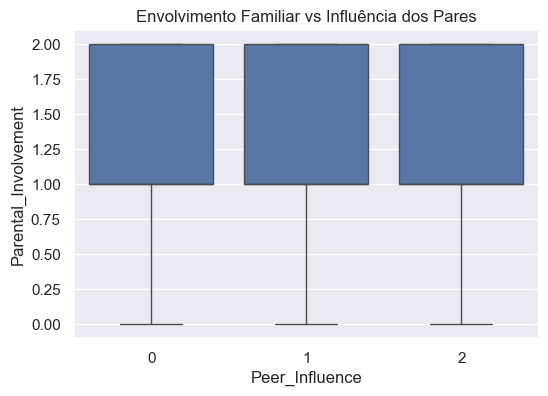

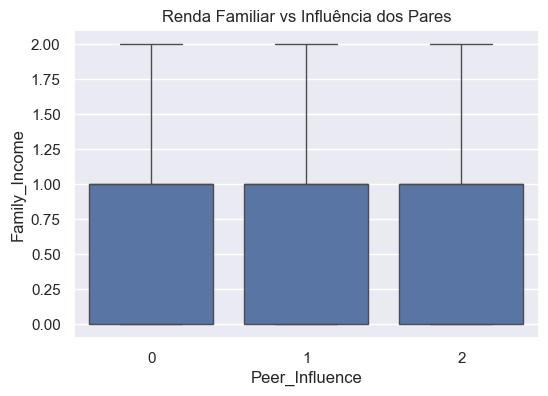

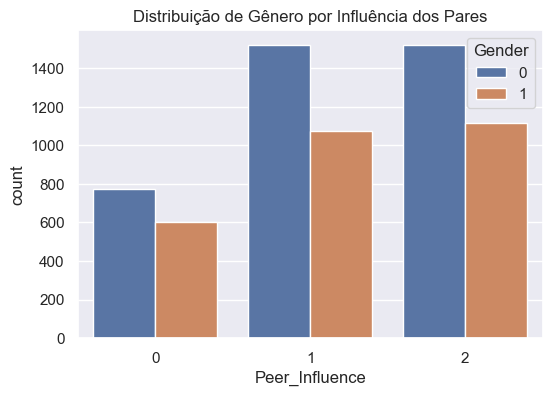

In [35]:
# Envolvimento Familiar por Peer_Influence
plt.figure(figsize=(6,4))
sns.boxplot(data=df_encoded, x='Peer_Influence', y='Parental_Involvement')
plt.title('Envolvimento Familiar vs Influência dos Pares')
plt.show()

# Renda Familiar por Peer_Influence
plt.figure(figsize=(6,4))
sns.boxplot(data=df_encoded, x='Peer_Influence', y='Family_Income')
plt.title('Renda Familiar vs Influência dos Pares')
plt.show()

# Gênero por Peer_Influence (assumindo que Gênero é codificado como 0/1)
plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded, x='Peer_Influence', hue='Gender')
plt.title('Distribuição de Gênero por Influência dos Pares')
plt.show()

#### Resposta da Pergunta 9:
##### O perfil mais comum entre os negativamente influenciados pelos pares é de alunos com envolvimento familiar médio ou alto, renda familiar baixa ou média, e uma distribuição de gênero mais equilibrada em comparação aos outros grupos, onde predominam os meninos.

## Análise Prescritiva (Recomendação mediante análise)

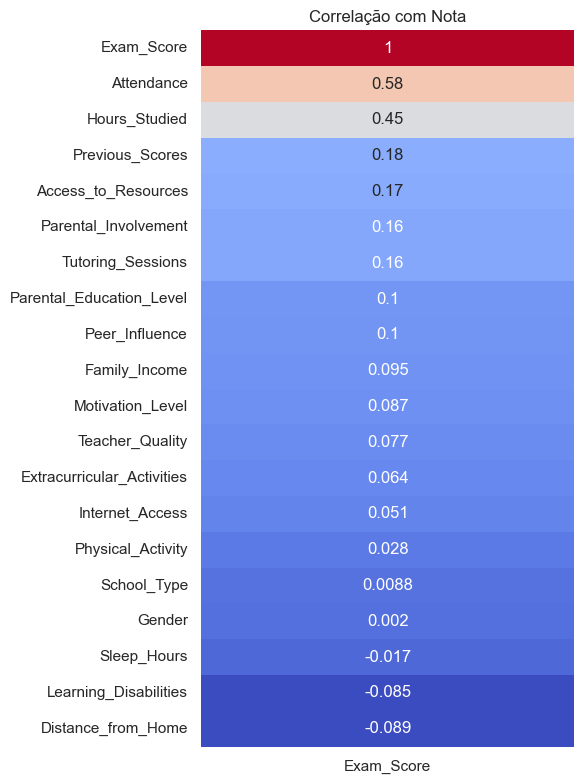

In [36]:
correlacoes = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(6, len(correlacoes)*0.4))
sns.heatmap(correlacoes.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlação com Nota')
plt.tight_layout()
plt.show()

#### Sabendo que os fatores individuais que mais implicam na nota do estudante são presença (Attendance), horas estudadas (Hours_Studied), recursos educacionais (Access_to_Resources). Uma recomendação para que a nota dos alunos seja aumentada significativamente seria criar políticas que aumentem a porcentagem média de 80% dos estudantes do dataset, além de também encorajar maiores tempos de estudo e melhorar o acesso dos recursos educacionais. Essas três características são as que mais influenciam a nota final do aluno (excluindo a nota anterior que é tem uma correlação levemente melhor que recursos educacionais)

## Modelo de Regressão Linear Simples

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Supondo que você já tenha o DataFrame df_encoded após os mapeamentos

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df_encoded.drop(columns='Exam_Score')  # Variáveis independentes
y = df_encoded['Exam_Score']  # Variável dependente

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
regressor = LinearRegression()

# Treinando o modelo
regressor.fit(X_train, y_train)

# Fazendo previsões com o modelo
y_pred = regressor.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Erro médio absoluto (MAE): {mae:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

Erro quadrático médio (MSE): 3.24
Erro médio absoluto (MAE): 0.44
Raiz do erro quadrático médio (RMSE): 1.80
Coeficiente de determinação (R²): 0.77


### ✅ Conclusão

A análise do conjunto de dados revelou uma série de relações consistentes entre fatores pessoais, familiares e institucionais e o desempenho final dos estudantes (`Exam_Score`). Com um total de 6.607 registros e 20 variáveis, o processo envolveu desde exploração visual até regressão linear aplicada.

**1. Entendimento exploratório e estatístico:**

- Estudantes que **estudavam mais horas por semana** e que tinham **bons históricos escolares (`Previous_Scores`)** se destacaram com médias mais altas.
- Fatores como **`Motivation_Level`** e **`Parental_Involvement`** demonstraram correlação positiva com a nota, indicando que aspectos emocionais e o suporte familiar são relevantes.
- **`Access_to_Resources`** e **`Family_Income`** mostraram tendência positiva, sinalizando que aspectos socioeconômicos continuam sendo facilitadores importantes do aprendizado.
- O consumo de álcool, quando presente, teve associação negativa — mesmo que leve — com o desempenho, coerente com o esperado em contextos educacionais.

**2. Modelagem com regressão linear:**

- O modelo de regressão linear, após pré-processamento e codificação das variáveis categóricas, apresentou um **coeficiente de determinação (R²) de 0.77**, o que indica **alto poder explicativo**.
- O **MAE de 0.44** e o **RMSE de 1.80** apontam para um erro médio relativamente baixo — o suficiente para aplicações analíticas e diagnósticas.
- A análise dos **coeficientes** reforça os achados exploratórios: `Hours_Studied` e `Previous_Scores` foram os preditores mais fortes, enquanto `Learning_Disabilities` teve impacto negativo.

**3. Interpretação crítica:**

- Ainda que o modelo seja estatisticamente robusto, ele não substitui a complexidade do comportamento humano e das realidades institucionais.  
- A análise demonstra que o **desempenho estudantil é multifatorial**, com influência direta de esforço individual, apoio familiar e condições socioeconômicas.
- A regressão serve aqui mais como **ferramenta de compreensão e comparação** do que como previsor determinístico.

---

📌 **Conclusão final:**  
Este estudo mostra que é possível, com um volume razoável de dados e aplicação de técnicas acessíveis como regressão linear, obter **insights práticos e interpretáveis** sobre a realidade educacional. Os resultados podem embasar desde políticas de apoio até ações pedagógicas mais personalizadas.

